In [65]:
#Unzip our data into google drive
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

#🐶 End-to-end Multi-class Dog Breed classification 
This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog

## 2. Data
The data we're using is from Kaggle's dog breed identification competition

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog test image

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with images(unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs(means 120 different classes).
* There are around 10,000+ images in training set(these images have labels)
* There are around 10,000+ images in test set (these images do not have labels).

##Get our workspace ready
* Import TensorFlow 2.x✅
* Import TensorFlow Hub✅
* Make sure we're using GPU✅

In [66]:
#import TensorFlow into Colab
#Import Tensorflow Hub
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow:", tf.__version__)
print("TF Hub verion", hub.__version__)
#Check for GPU availaibility
print("GPU","avalaible (YES!!)" if tf.config.list_physical_devices("GPU") else "not available:(")


TensorFlow: 2.2.0
TF Hub verion 0.8.0
GPU avalaible (YES!!)


## Getting our data ready (turning into Tensors)

With all machine learning model, our data has to be in numerical format.So that's what we'll be doing first. Turning our images into Tensors (numerical representation)

Let's start by accessing our data and checking out the labels

In [67]:
# Checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("/content/drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     40fb9c5e1ffbcd7c3d36afaf4e92525a  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [68]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

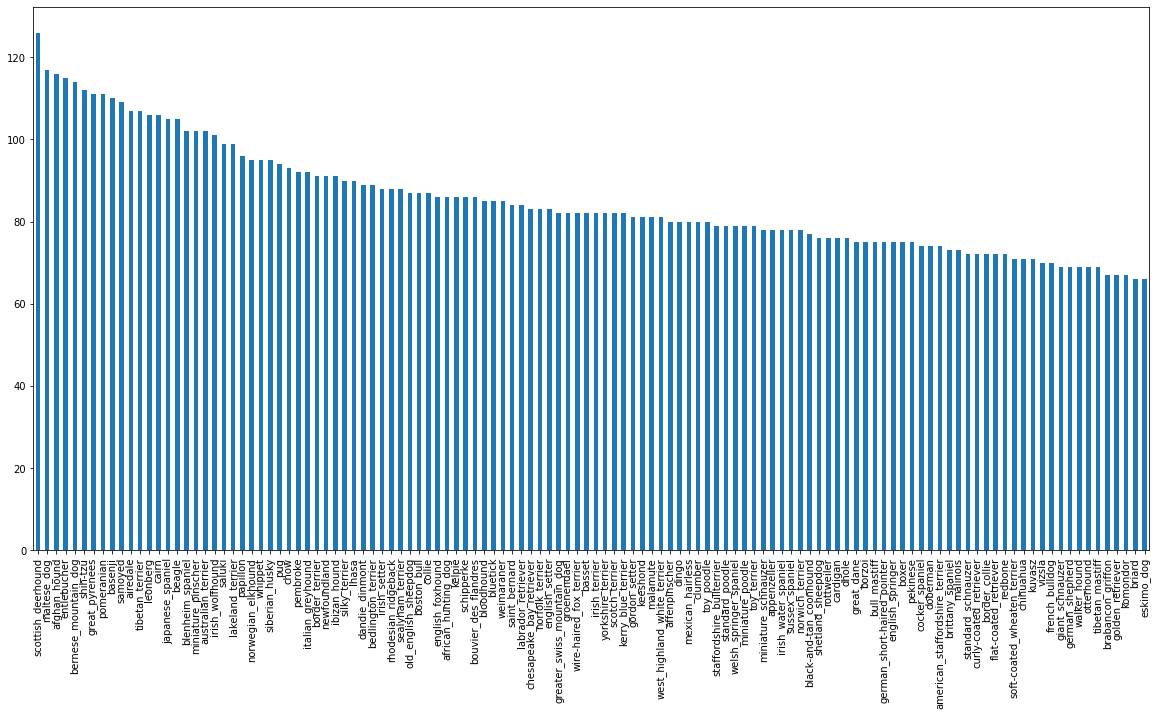

In [69]:
#How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [70]:
#what's the median of the number of images per class?
labels_csv["breed"].value_counts().median()

82.0

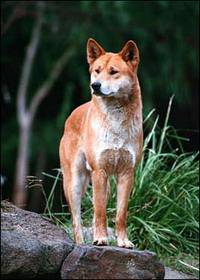

In [71]:
#Let's view an image
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/00a338a92e4e7bf543340dc849230e75.jpg")

### Getting images and their labels
Let's get a list of all our images file pathnames

In [72]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [73]:
#Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/"+fname +".jpg" for fname in labels_csv["id"]]

#check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [74]:
import os
os.listdir("drive/My Drive/Dog Vision/train/")[:10]

['f1f03709a6fb351e6255cabc277c5fc4.jpg',
 'eff6f9f023d63b83056ee3cabd204d9a.jpg',
 'ea42de31f9b6e2c8f44a48ab53bc5fd4.jpg',
 'eada9c7e7e1d9fde5df22b28e0ca9341.jpg',
 'eed0a81e48da6883e1f3f248b3d398f2.jpg',
 'f692fcf95607b6e82528b0e90d705725.jpg',
 'edcf20f5ebcab09f0db88d0358b3ab56.jpg',
 'f523e20f7fac8e1d9909d0956a468467.jpg',
 'f0424f62ba3e580e9f34de645fb7cad4.jpg',
 'ef1129cb127bff04fd3940d94f2a259b.jpg']

In [75]:
#Check whether number of files match number of actual images file
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!! Proceed.")
else:
  print("Filenames do not match actual amount of files,check the target directory.")

Filenames match actual amount of files!! Proceed.


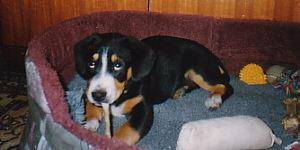

In [76]:
#One more check
Image(filenames[80])


In [77]:
labels_csv["breed"]

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

Since we've now got our training image filepaths in a list,let's prepare our labels

In [78]:
import numpy as np
labels= labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [79]:
len(labels)

10222

In [80]:
#See if number of labels matches the number of filenames
if len(labels)== len(filenames):
  print("Yes!")
else:
  print("No!")

Yes!


In [81]:
#Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [82]:
#Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [83]:
#TURN every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [84]:
len(boolean_labels) == len(labels)

True

In [85]:
#EXAMPLE: Turning boolean array into integers
print(labels[0])#original label
print(np.where(unique_breeds == labels[0]))# index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [86]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [87]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set we are going to create our own validation set

In [88]:
#Setup X & y Variables
X = filenames
y = boolean_labels

In [89]:
len(filenames)

10222

We're goin to start off experimenting with ~1000 images and increase as needed.

In [90]:
#Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:100}

In [91]:
#Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

##Split them into training and validation of total size NUM_IMAGES
X_train,X_val, y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [92]:
#Let's have a geez at the training data
X_train[:5],y_train[:5]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images(turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable,`image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image` 

In [93]:
#Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [94]:
image.max(), image.min()

(255, 0)

In [95]:
#Convert image to image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Now we've seen what an image looks like as a Tensor,let's make a function to preprocess them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable,`image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image(convert colour channel values from (0-255 to 0-1).
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image` 

In [96]:
# Define image size
IMG_SIZE = 224

#Create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  #Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
  image=tf.image.decode_jpeg(image,channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  #Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[img_size,img_size])

  return image


 ## Turning our data into batches
 Why turn our data into batches?

 Let's say you're trying to process 10,000+ images in one go they all might not fit into memory.

 So that's why we do about 32( this is the batch size) images at a time (you can manually adjust the batch size if need be)

 In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image,label)


In [97]:
#Create a simple function to return a tuple(image,label)
def get_image_label(image_path, label):
  """Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label).
  """
  image = process_image(image_path)
  return image, label

In [98]:
(process_image(X[42]), (y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `image,label` .,let's make a function to turn all of our data(X&y) into batches

In [179]:
# Define the batch size,32 is a good start
BATCH_SIZE = 32

##Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data oout of image(X) and label(y) pairs.
  Shuffles the data if it'a training data
  """

  #If the data is a test dataset,we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepath(no labels)
    data_batch= data.map(process_image).batch(BATCH_SIZE)
    return data_batch

    #If the data is a valid dataset,we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),#filepaths
                                                tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
      
    return data_batch                                     
  else:
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    #Shuffling pathnames and labe; before mapping image processor frunction is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    #Create (image,label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [100]:
#Creating training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [101]:
#Check out the different attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#Visaulizing Data Batches
Our data is now in batches, these can be a little hard to understand/comprehend,let's visualize the batches

In [102]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and thier labels from a data batch.
  """
  #Setup the figure
  plt.figure(figsize=(10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    #Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis("off")

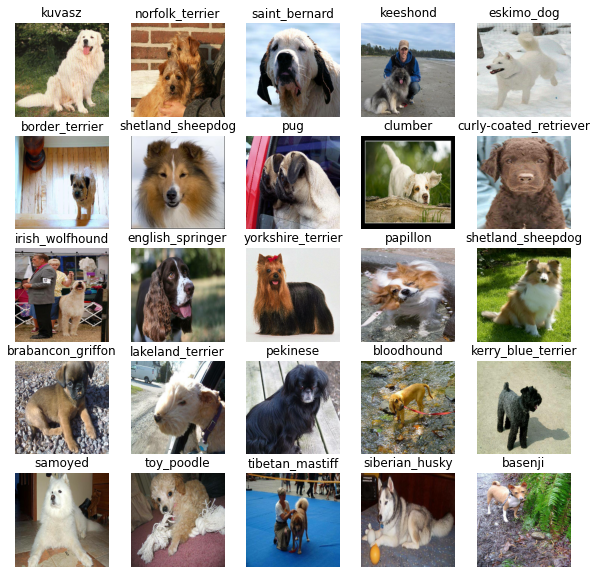

In [103]:
# Now let's visualize the data in a training batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

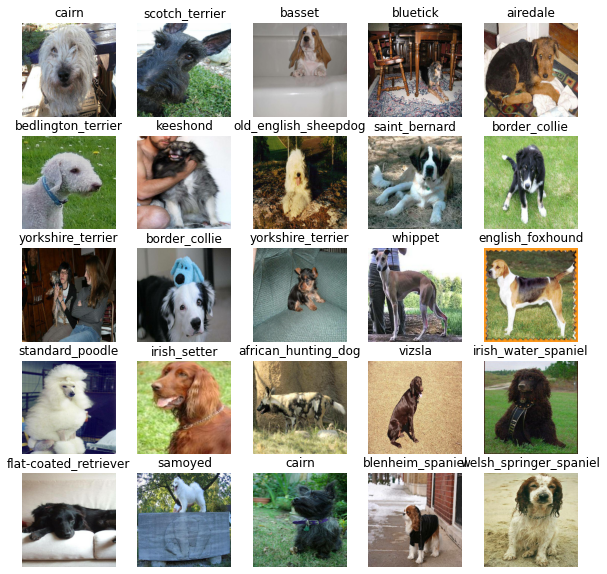

In [104]:
#Now let's visualize our validation set
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model
Before we build a model, there are a few things we need to define :
* Input shape (our images shape,in the fprm of Tensors) of our model.
* The Output shape(image labels,in the form of Tensors) of our model.
* The URL of the model we want to use.
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [105]:
#Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,colour channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs,outputs and model ready to go.
Let's put them together into Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape,output shape and the model we've chosen as parameters.
* Define the labels in a Keras model in sequential fashion (do this first,then this, then that).
* Compiles the model(says it should be evaluated and improved).
* Builds the model(tells the model the input shape it'll be getting).
* Returns the model.

In [106]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  #Setup the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(MODEL_URL),#Layer 1 (input layer)
          tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                      activation="softmax")]) #Layer 2 (output layer)

  #compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  
  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [107]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_2 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress asnd another for early model from training for too long

##TensorBoard Callback
1. Load the TensorBoard notebook extension✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.✅
3. Visualize our models training logs with the %tensorboard magic function(we'll do this after model training)✅

In [108]:
#Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [109]:
import datetime

#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #Create a log directory for storing Tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        #Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

Early stopping helps stop our model fro overfitting by stopping training if certain evaluation metric stops improving.

In [110]:
#Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000images, to make sure everything is working.

In [111]:
NUM_EPOCHS = 70 #@param{type:"slider", min:10, max:100,step:10}

In [112]:
# Check to make sure we're still using GPU
print("GPU","available(Yes!!)" if tf.config.list_physical_devices("GPU")else "not available:(")

GPU available(Yes!!)


Let's create a function which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data,number of epochs to train for(NUM_EPOCHS) and the callbacks we'd like to use
* Return the model.

In [113]:
#Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  #Create a model
  model = create_model()

  #Create new TensorBoard session everytime we train a model
  tensorboard =  create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  #Return the fitted model
  return model
  

In [114]:
#Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
 2/25 [=>............................] - ETA: 7s - loss: 5.8929 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.259720). Check your callbacks.


25/25 [==============================] - 5s 204ms/step - loss: 4.6107 - accuracy: 0.0962 - val_loss: 3.4939 - val_accuracy: 0.2300
Epoch 2/10
25/25 [==============================] - 4s 174ms/step - loss: 1.6453 - accuracy: 0.7025 - val_loss: 2.2438 - val_accuracy: 0.4600
Epoch 3/10
25/25 [==============================] - 4s 173ms/step - loss: 0.5554 - accuracy: 0.9425 - val_loss: 1.7536 - val_accuracy: 0.6000
Epoch 4/10
25/25 [==============================] - 4s 168ms/step - loss: 0.2504 - accuracy: 0.9837 - val_loss: 1.5659 - val_accuracy: 0.6250
Epoch 5/10
25/25 [==============================] - 4s 169ms/step - loss: 0.1443 - accuracy: 0.9987 - val_loss: 1.4846 - val_accuracy: 0.6300
Epoch 6/10
25/25 [==============================] - 4s 167ms/step - loss: 0.0989 - accuracy: 1.0000 - val_loss: 1.4341 - val_accuracy: 0.6550
Epoch 7/10
25/25 [==============================] - 4s 169ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 1.4073 - val_accuracy: 0.6650
Epoch 8/10
25/25 

### Checking the TensorBoard logs
The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize it's contents

In [115]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

Reusing TensorBoard on port 6006 (pid 1384), started 0:37:25 ago. (Use '!kill 1384' to kill it.)

<IPython.core.display.Javascript object>

## Making and Evaluating predictions using a trained model

In [116]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [117]:
#Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 107ms/step


array([[2.0192340e-03, 3.0548780e-04, 1.4951270e-03, ..., 1.2720280e-04,
        2.4443905e-05, 7.5291339e-03],
       [8.1450085e-04, 5.5737846e-04, 3.8762558e-03, ..., 2.3634186e-04,
        4.4641262e-03, 1.1271541e-04],
       [5.3120253e-05, 1.8467344e-04, 2.3946601e-05, ..., 1.0042049e-03,
        4.1036488e-05, 6.3596852e-04],
       ...,
       [9.2204145e-06, 4.4767567e-05, 1.2256257e-05, ..., 3.3603719e-05,
        7.2729679e-05, 3.1791022e-04],
       [8.7909645e-04, 1.8004426e-04, 2.4546453e-04, ..., 2.6842061e-05,
        6.4194370e-05, 6.5783067e-03],
       [1.7144908e-04, 2.5309146e-05, 5.8583287e-04, ..., 1.0782849e-02,
        7.4807752e-04, 6.9640196e-06]], dtype=float32)

In [118]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Prediction label: {unique_breeds[np.argmax(predictions[index])]}")

[3.10026189e-05 1.01994803e-04 1.63873374e-05 1.10738394e-04
 3.66502767e-03 1.47072686e-04 2.65164650e-04 1.00267597e-03
 4.06932971e-03 1.52440399e-01 3.21503940e-05 3.24484754e-05
 5.22461429e-04 5.92570379e-03 1.37849618e-03 2.95825675e-03
 1.06541884e-04 1.00501999e-03 1.95979010e-04 2.09934398e-04
 2.87153438e-04 5.30287332e-04 8.89877556e-05 3.30259172e-05
 3.27704404e-03 1.73791886e-05 3.44092805e-05 8.65159745e-05
 1.54280831e-04 2.17275083e-05 4.80380368e-05 3.07968119e-04
 6.26595065e-05 3.39641265e-05 1.57513150e-05 4.74711778e-05
 9.96398885e-05 1.68518047e-04 6.47121924e-05 2.32730970e-01
 2.43090180e-05 7.32092076e-06 4.59303753e-03 1.05333620e-05
 2.55713792e-04 9.26083740e-05 1.49464977e-04 3.83601087e-04
 5.38562599e-05 1.69585488e-04 1.18662276e-04 2.50799174e-04
 4.51393513e-04 1.98964751e-03 4.26829465e-05 1.48705600e-04
 9.10465315e-05 2.55668565e-05 1.25994702e-04 1.58816074e-05
 1.26983621e-04 4.48654755e-04 6.50260563e-06 8.83093962e-05
 3.36893063e-05 2.186498

In [119]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scle.

And it would be even better if we could see the image the prediction is being made on

**Note:** Prediction probabilities are also known as confidence levels. 

In [120]:
# Turn Prediction probabilities into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
 """
 Turns an array of prediction probabilities into a label.
 """
 return unique_breeds[np.argmax(prediction_probabilities)]

#Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

Now since our validation data is still in a batch dataset, we'll have to unbatch it to make predictions on the validation images and then compute those predcitions to the validation labels (truth labels).

In [121]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [122]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batch dataset of (image,label) Tensors
 and returns seperate arrays of image and labels.  """
  images = []
  labels = []

  #Loop through unbatch data
  for image,label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels
#Unbatchify the validation data
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels(truth labels)
* Validation images

Let's make some function to make these all a bit more visual

We'll create a function which:
* Takes an array of prediction probabilities,an array of truth labels and an array of images and intergers.✅
* Convert the prediction probabilities to a predicted label.✅
* Plot the predicted label,its predicted probability,the truth label and the target image on a single plot.✅

In [123]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View the prediction,ground truth and image for sample n
  """
  pred_prob,true_label,image = prediction_probabilities[n],labels[n],images[n]

  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  #Change plot titile to be predicted,probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

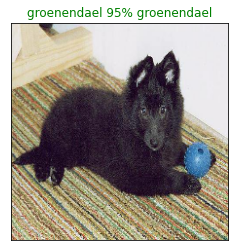

In [130]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one functioin to visualize our models top prediction, let's make another to view our models top 10 prediction.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels,coloring the true label green

In [128]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plus the top 10 highest prediction confidence along with the truth label for sample n
  """
  pred_prob,true_label = prediction_probabilities[n],labels[n]

  #Get the predicted label
  pred_label = get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_preds_indexes = pred_prob.argsort()[-10:][::-1]
  #Find the top 10 prediction confidence values
  top_10_preds_values = pred_prob[top_10_preds_indexes]
  #Find the top 10 prediction labels
  top_10_preds_labels = unique_breeds[top_10_preds_indexes]

  #Setup plot
  top_plot = plt.bar(np.arange(len(top_10_preds_labels)),
                     top_10_preds_values,
                     color= "grey")
  plt.xticks(np.arange(len(top_10_preds_labels)),
                        labels = top_10_preds_labels,
                          rotation="vertical")

  #Change color of truth label
  if np.isin(true_label, top_10_preds_labels):
    top_plot[np.argmax(top_10_preds_labels == true_label)].set_color("green")
  else:
    pass 

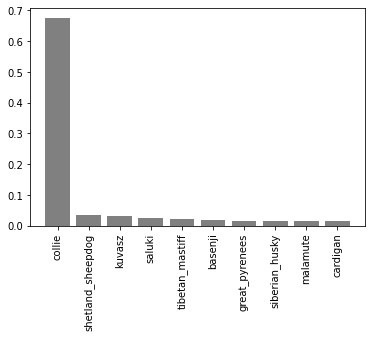

In [129]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

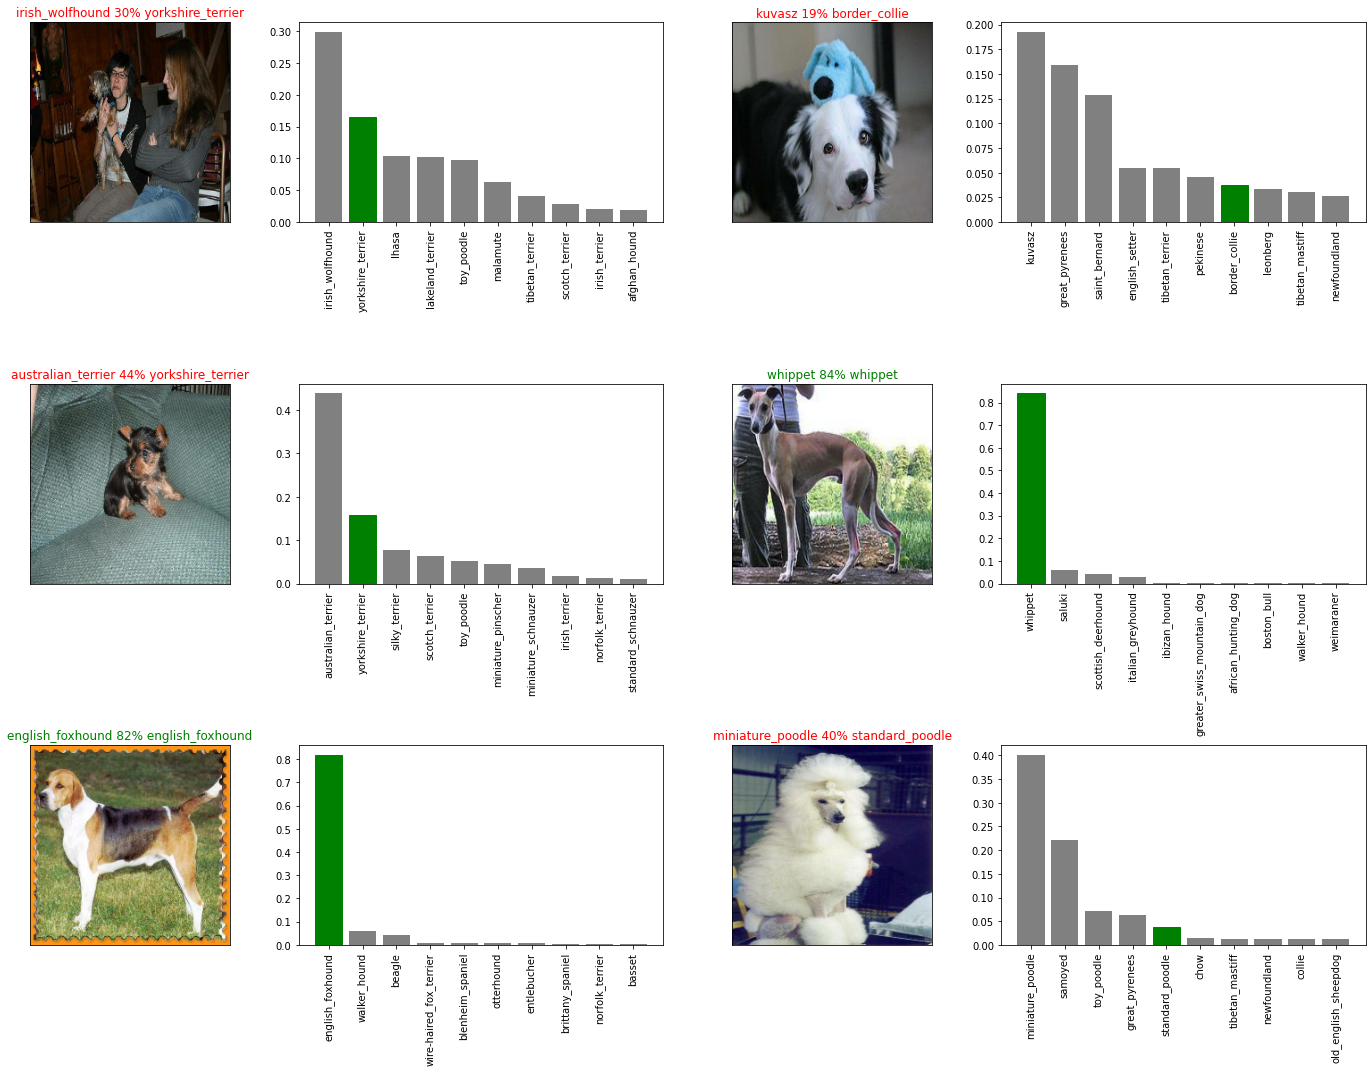

In [148]:
#Let's check out a few predcition and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels= val_labels,
            images= val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,
                  n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)               
plt.show();

## Saving and reloading a trained model

In [152]:
# Create a function to save a model
def save_model(model,suffix=None):
  """
  Saves a given model in a models directory and appends a suffix(string)
  """

  #Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [157]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got function to save and load a trained model, let's make sure they work!

In [154]:
#Save our model trained on 100 images
save_model(model, suffix="100-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200706-05221594012936-100-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200706-05221594012936-100-images-mobilenetv2-Adam.h5'

In [158]:
#Load a trained model
loaded_1000_image_model = load_model("/content/drive/My Drive/Dog Vision/models/20200706-05221594012936-100-images-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/My Drive/Dog Vision/models/20200706-05221594012936-100-images-mobilenetv2-Adam.h5


In [160]:
#Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 101ms/step - loss: 1.3469 - accuracy: 0.6550


[1.3468512296676636, 0.6549999713897705]

In [161]:
#Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 113ms/step - loss: 1.3469 - accuracy: 0.6550


[1.3468512296676636, 0.6549999713897705]

## Training a big dog model🐶(on full data)

In [162]:
len(X), len(y)

(10222, 10222)

In [163]:
X[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [164]:
len(X_train)

800

In [165]:
# Create a data batch with the full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [166]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [167]:
full_model= create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [169]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30min for the first epoch) because the GPU we're using in the runtime has to load all of the images into images into memory.

In [170]:
#Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - 3211s 10s/step - loss: 1.3144 - accuracy: 0.6712
Epoch 2/10
320/320 [==============================] - 46s 144ms/step - loss: 0.3971 - accuracy: 0.8840
Epoch 3/10
320/320 [==============================] - 46s 143ms/step - loss: 0.2357 - accuracy: 0.9352
Epoch 4/10
320/320 [==============================] - 46s 143ms/step - loss: 0.1524 - accuracy: 0.9634
Epoch 5/10
320/320 [==============================] - 46s 143ms/step - loss: 0.1047 - accuracy: 0.9797
Epoch 6/10
320/320 [==============================] - 46s 143ms/step - loss: 0.0771 - accuracy: 0.9871
Epoch 7/10
320/320 [==============================] - 45s 142ms/step - loss: 0.0585 - accuracy: 0.9915
Epoch 8/10
320/320 [==============================] - 46s 145ms/step - loss: 0.0468 - accuracy: 0.9941
Epoch 9/10
320/320 [==============================] - 46s 142ms/step - loss: 0.0383 - accuracy: 0.9961
Epoch 10/10
320/320 [==============================] - 46s 144ms/step - l

In [171]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200706-06421594017754-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200706-06421594017754-full-image-set-mobilenetv2-Adam.h5'

In [188]:
Loaded_full_model = load_model("drive/My Drive/Dog Vision/models/20200706-06421594017754-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20200706-06421594017754-full-image-set-mobilenetv2-Adam.h5


In [173]:
len(X)

10222

## Making prediction on test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()`
earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data,we'll:
* Get the test image filename✅
* Convert the filename into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).✅
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [190]:
#Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path +fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/f285b753c96949769c745ec0f90b2253.jpg',
 'drive/My Drive/Dog Vision/test/f320aa2676156d3760a409e1b333474d.jpg',
 'drive/My Drive/Dog Vision/test/f3094e7b2a65b2fa50e0f4ac2e3021b4.jpg',
 'drive/My Drive/Dog Vision/test/ecb31808b1717c297072d6f5b8760c2f.jpg',
 'drive/My Drive/Dog Vision/test/ea0a6a12e3f6f65e4f742b258a0ffe30.jpg',
 'drive/My Drive/Dog Vision/test/ea369808f5d3c8fef21c674b80564e35.jpg',
 'drive/My Drive/Dog Vision/test/e9b105a5b7873f33477f777d5a9447f8.jpg',
 'drive/My Drive/Dog Vision/test/f4a2ee1dd5542da8b0150fe8f7a2b7c3.jpg',
 'drive/My Drive/Dog Vision/test/f3482b871bff6a7d6907f10eeac75aea.jpg',
 'drive/My Drive/Dog Vision/test/f56b4140707da82fe91cb9e5df4ce68c.jpg']

In [191]:
len(test_filenames)

10357

In [192]:
#Create test data batch
test_data = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [183]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about an hour)

In [193]:
#Make predictions on test data batch using the loaded full model
test_predictions = Loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 4038s 12s/step


In [195]:
#Save predictions (NumPy array) to csv file (for access later)
#np.savetxt("drive/My Drive/Dog Vision/preds_array.csv",test_predictions,delimiter=",")

In [196]:
#Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv",delimiter=",")

In [197]:
test_predictions[:10]

array([[4.37326692e-02, 3.57205790e-05, 1.41803193e-05, ...,
        2.27376790e-06, 1.63888814e-08, 2.46756375e-02],
       [3.21603233e-09, 6.65986377e-10, 1.00371755e-08, ...,
        2.56071053e-06, 3.35275558e-08, 3.78318852e-08],
       [5.52922756e-06, 8.96128313e-06, 1.08724663e-09, ...,
        1.75792394e-07, 5.84703308e-08, 2.95797940e-06],
       ...,
       [6.42435793e-09, 1.25618124e-06, 3.57537311e-09, ...,
        1.47855314e-06, 2.50095982e-05, 2.44805882e-08],
       [5.43675931e-08, 8.72985538e-07, 4.16353174e-09, ...,
        8.80402354e-07, 2.85769204e-07, 1.20497219e-07],
       [1.85240034e-09, 1.61114162e-08, 3.54436303e-09, ...,
        1.75388527e-06, 7.19948823e-11, 1.01752974e-10]])

In [199]:
test_predictions.shape

(10357, 120)

#Make predictions on custom images
To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepath into data batches using
`create_data_batches()`. And since our custom images won't have labels,we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [201]:
#Get custom image filepaths
custom_path = "drive/My Drive/Dog Vision/my-dog-photos/"
custom_image_paths =[custom_path + fname for fname in os.listdir(custom_path)]

In [202]:
custom_image_paths

['drive/My Drive/Dog Vision/my-dog-photos/file_23012_beagle-460x290.jpg',
 'drive/My Drive/Dog Vision/my-dog-photos/Siberian-Husky-standing-outdoors-in-the-winter.jpg',
 'drive/My Drive/Dog Vision/my-dog-photos/IMG_0890.jpg']

In [204]:
# Turn custom images into batch dataset
custom_data = create_data_batches(custom_image_paths,test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [205]:
# Make predictions on the custom data
custom_preds = Loaded_full_model.predict(custom_data)

In [206]:
custom_preds.shape

(3, 120)

In [207]:
#get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i])for i in range(len(custom_preds))]
custom_preds_labels

['english_foxhound', 'siberian_husky', 'german_shepherd']

In [209]:
#Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
#Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

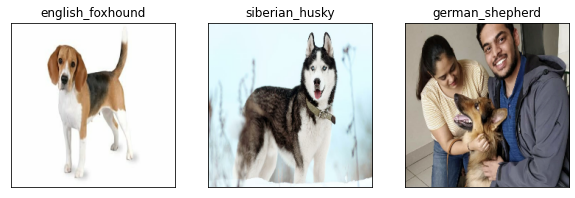

In [211]:
#Check custom image predictions
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)